# Shape from shading
Team members
- Arunabh Ghosh (15007006) <br/>
- Srivatsan Sridhar (150070005)<br/>
---
An ideal lambertian sphere is used for all simulations. The source is placed at [0, 0, 1] and the radiance is calulated as follows:<br/>
![1.png](nb/1.png)<br/>

---
The update equations at each step are as follows. In the case of $p, q$, $f, g$ is replaced by $p, q$ respectively.<br/>
![2.png](nb/2.png)<br/>

---
where<br/>

---
![3.png](nb/3.png)<br/>

---
The conversion from $f, g$ to $p, q$ and vice-versa is given as follows:<br/>

---
![4.png](nb/4.png)<br/>

---
Finally the depth is estimated using an iterative scheme, using the equation given below:<br/>
![5.png](nb/5.png)<br/>

### Question 1, 2
The noise is varied and the the depth_map is visualized. The no-noise case corresponds to the first question.

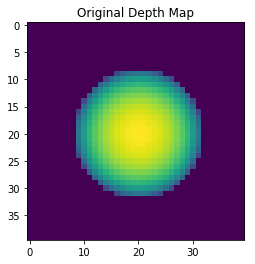

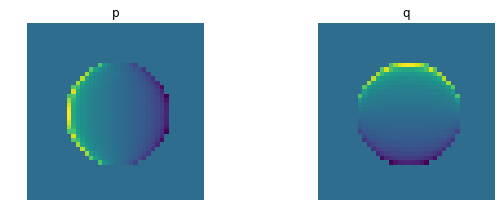

Noise in E(x, y): 0.0


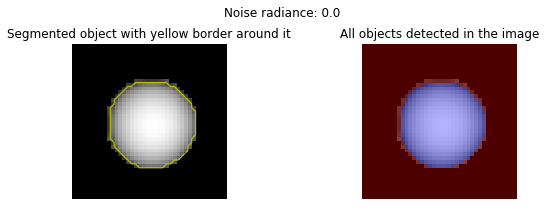

Error: 0.010069281077189199


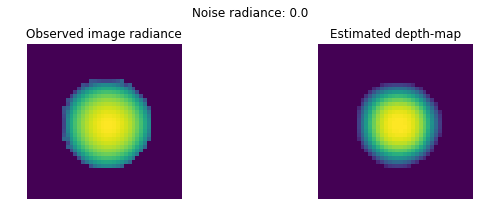

Noise in E(x, y): 0.05


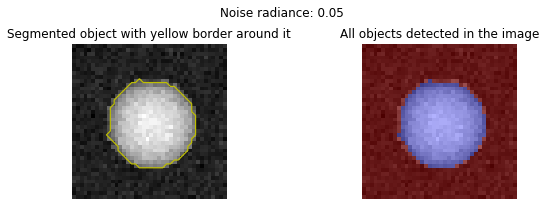

Error: 0.010714970735921798


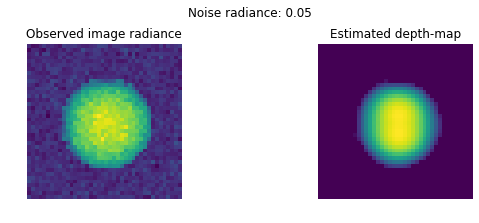

Noise in E(x, y): 0.1


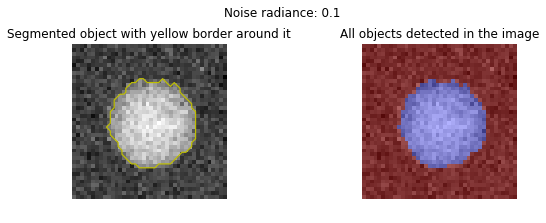

Error: 0.011189255552437655


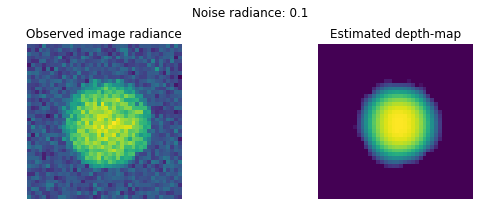

Noise in E(x, y): 0.15


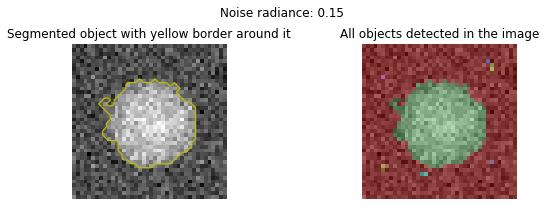

Error: 0.01033873346512644


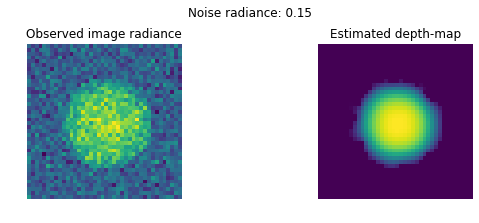

In [19]:
%matplotlib inline
%run ./shape_from_shading_noise_variation.py

We can see from the rough error estimate as well as a simple visualization that as the value of noise is increased, the depth estimated by our algorithm detoriates.

### Question 3
For every noisy case, we check the value of λ at which we get a convergent solution. 

For noise = 0.0, convergent_lambda is 0.001
Error: 0.010073376869623497


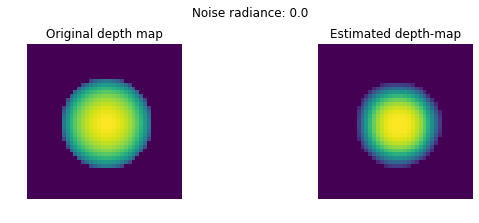

For noise = 0.02, convergent_lambda is 0.01
Error: 0.009592904363783869


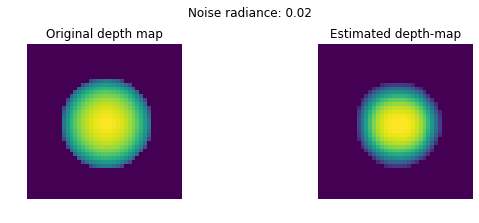

For noise = 0.04, convergent_lambda is 0.01
Error: 0.00954992576029457


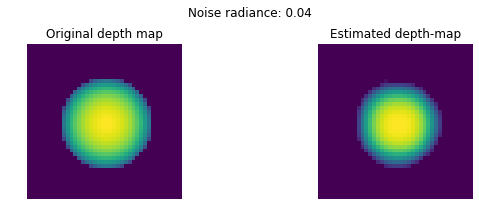

For noise = 0.06, convergent_lambda is 0.001
Error: 0.009515186363859174


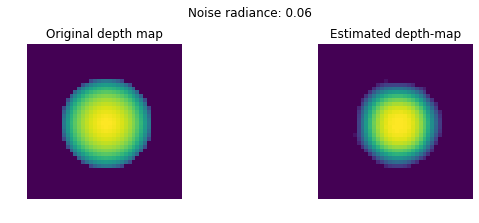

For noise = 0.08, convergent_lambda is 0.01
Error: 0.013362408663951612


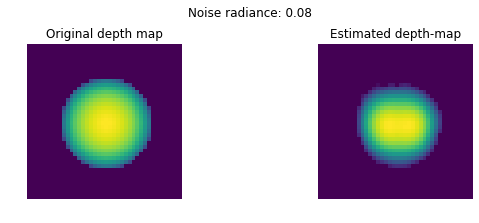

For noise = 0.1, convergent_lambda is 0.0001
Error: 0.012402853096893884


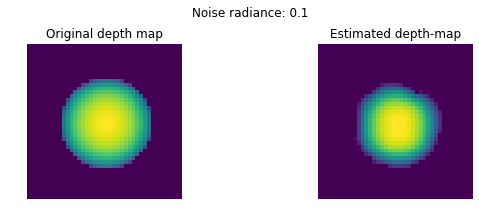

In [21]:
%matplotlib inline
%run ./shape_from_shading_lambda_variation.py

We see that for lesser values of $\lambda$ we get a much better estimate of depth map. The improvement can clearly be seen
on visualizing the depthmap. Also as the value of noise increases, the value of $\lambda$ at which the algorithm converges
decreases. This implies and confirms our intuition that, a big step in the presence of more noise is at the risk of
overshooting the solution.

### Question 4
Now we assume that there is a small error in source and repeat the noise variation step.
The noise is considered to be additive white gaussian noise - a small perturbation to the original source vector.

Perturbation of source vector:[-0.03872068 -0.01687907 -0.03023479]
Noise in E(x, y): 0.0
Error: 0.005655830692525166


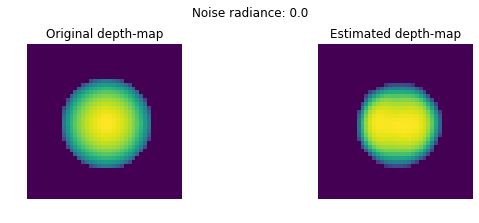

Noise in E(x, y): 0.05
Error: 0.006787617764585803


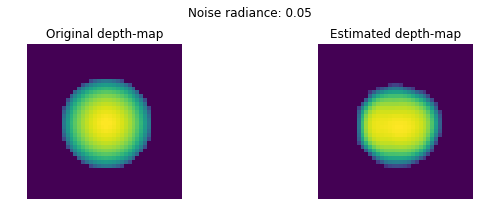

Noise in E(x, y): 0.1
Error: 0.005329499406036516


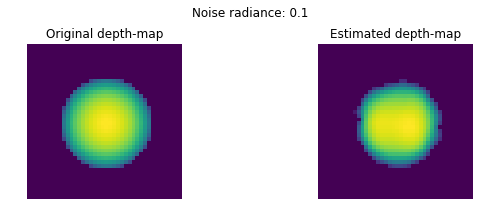

Noise in E(x, y): 0.15
Error: 0.006181440987824532


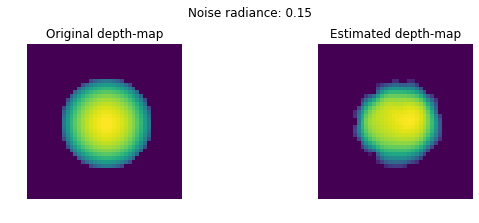

In [17]:
%matplotlib inline
%run ./shape_from_shading_noise_variation_source_noise

As can be seen, on adding a perturbation to the source vector, the resulting depth map is shifted in the direction of the perturbation. That is, Z is shifted in the direction of the perturbation. Also as expected, the reconstruction is poorer in the case of more noise.

### Question 5
Now instead of using $p, q$, we repeat the above experiments for $f, g$

#### Part 1, 2

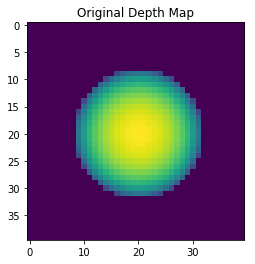

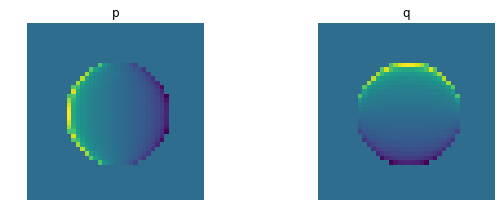

Noise in E(x, y): 0.0


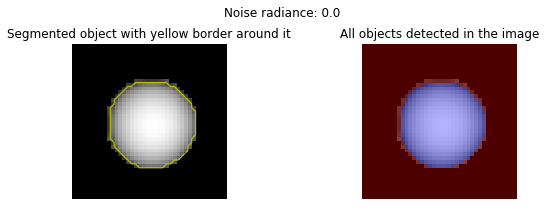

Error: 0.010069583272714086


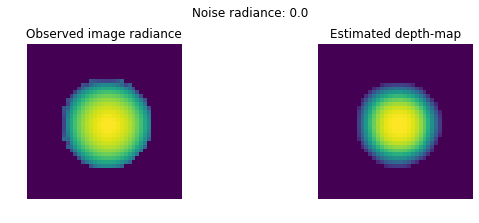

Noise in E(x, y): 0.05


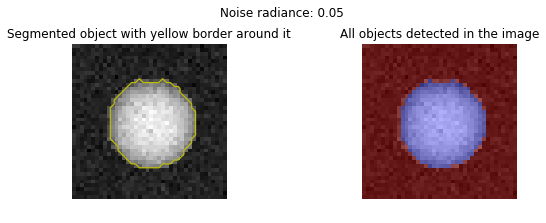

Error: 0.010018179784907691


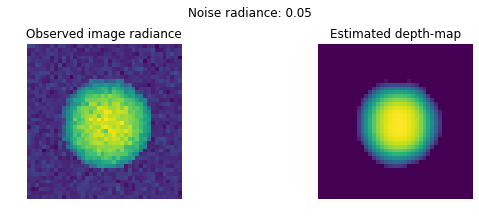

Noise in E(x, y): 0.1


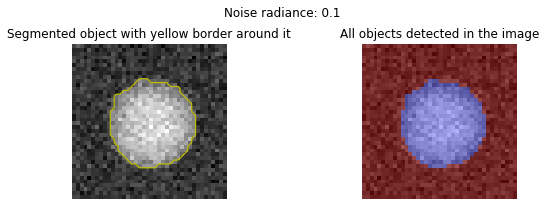

Error: 0.010788111312676629


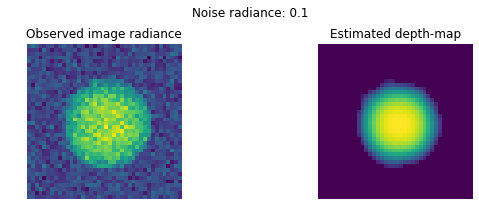

Noise in E(x, y): 0.15


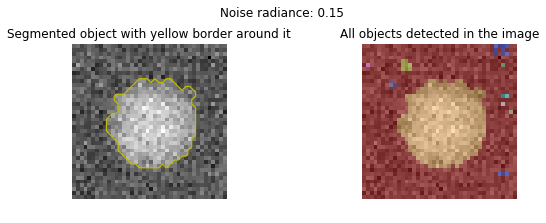

Error: 0.011088332273083524


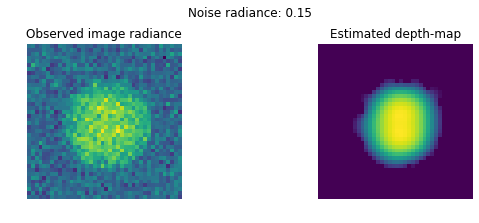

In [20]:
%matplotlib inline
%run ./shape_from_shading_fg_noise_variation.py

The results in this case are much better than the $p, q$ case. Also the deterioration rate with noise is lesser than $p, q$.
Thus, this is a more robust method.

#### Part 3
For every noisy case, we check the value of λ at which we get a convergent solution.

For noise = 0.0, convergent_lambda is 0.01
Error: 0.00949882444085279


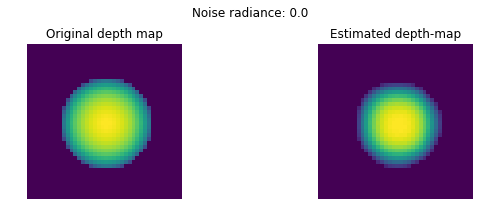

For noise = 0.02, convergent_lambda is 0.01
Error: 0.010152097395266894


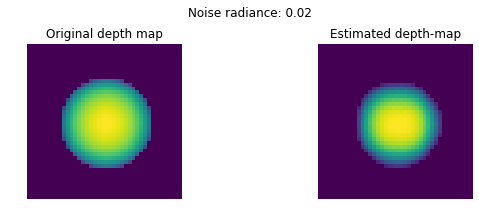

For noise = 0.04, convergent_lambda is 0.01
Error: 0.010390308353520672


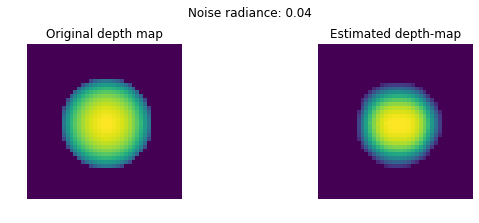

For noise = 0.06, convergent_lambda is 0.01
Error: 0.011009970270659735


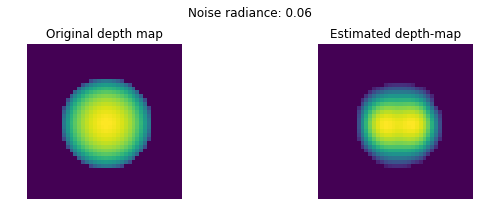

For noise = 0.08, convergent_lambda is 0.01
Error: 0.010214118849740448


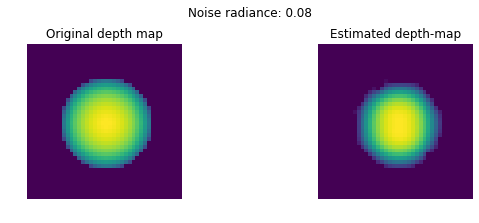

For noise = 0.1, convergent_lambda is 0.01
Error: 0.012018471096076145


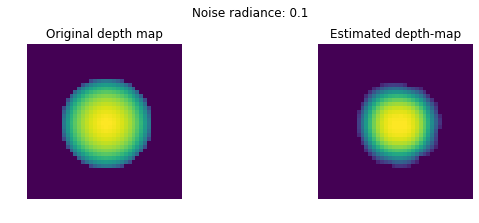

In [22]:
%matplotlib inline
%run shape_from_shading_fg_lambda_variation.py

We can see that, as the noise level increases, the convergent value of $\lambda$ remains the same. This maybe because the parameters $f, g$ are already regularized.

#### Part 4
Now we assume that there is a small error in source and repeat the noise variation step.
The noise is considered to be additive white gaussian noise - a small perturbation to the original source vector.

Perturbation of source vector:[-0.06811593  0.08753117 -0.03180884]
Noise in E(x, y): 0.0
Error: 0.0053328014313214055


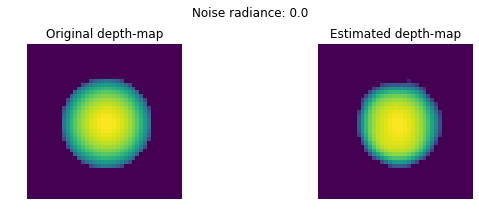

Noise in E(x, y): 0.05
Error: 0.006141387318879577


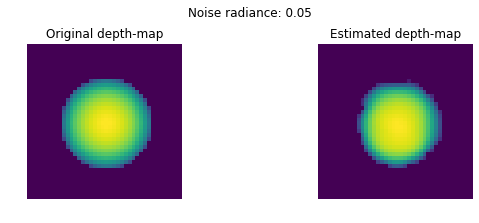

Noise in E(x, y): 0.1
Error: 0.005125590886229665


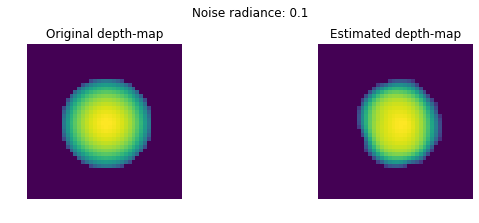

Noise in E(x, y): 0.15
Error: 0.006417965086405733


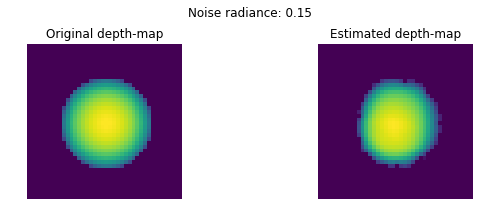

In [24]:
%matplotlib inline
%run ./shape_from_shading_fg_noise_variation_source_noise.py

As expected, we can see that the depth map shifts in the direction of the perturbation. However the intensity of shift is much
less than compared to $p, q$. This again implies the robustness of the $f, g$ algorithm.

### Question 6
Now we replace the smoothing penalization $p_x^2 + p_y^2 + q_x^2 + q_y^2$ with $p_{xx}^2 + p_{yy}^2 + q_{xx}^2 + q_{yy}^2$
and repeat the experiments of noise and lambda variation.

#### part 2

Noise in E(x, y): 0.0


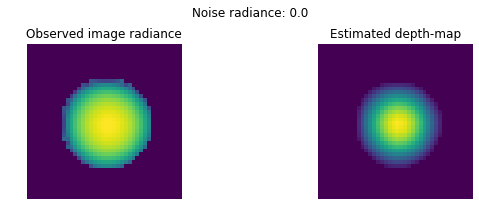

Noise in E(x, y): 0.05


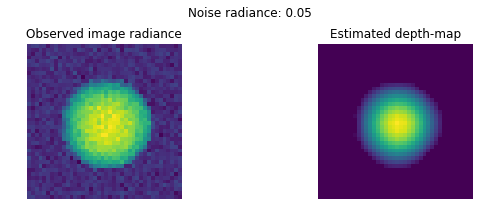

Noise in E(x, y): 0.1


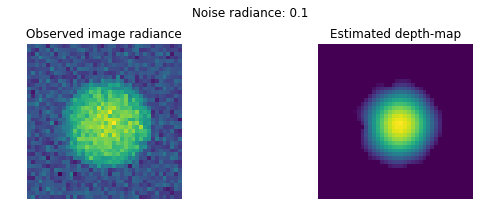

Noise in E(x, y): 0.15


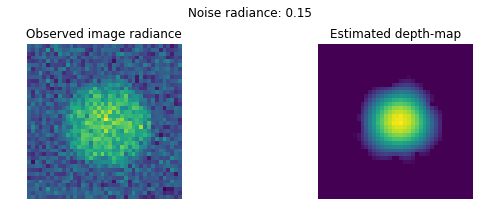

In [25]:
%matplotlib inline
%run ./shape_from_shading_alter_noise_variance.py

We can observe that the depth map estimated is more smoothly varying as we using the 2nd order deriviative as a penalty
term. This can easily be verified from the plots shown above.

For noise = 0.0, convergent_lambda is 0.01
Error: 0.02441743701017221


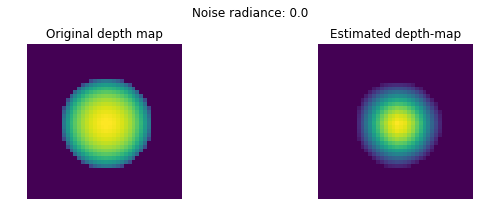

For noise = 0.02, convergent_lambda is 0.01
Error: 0.024395936200484948


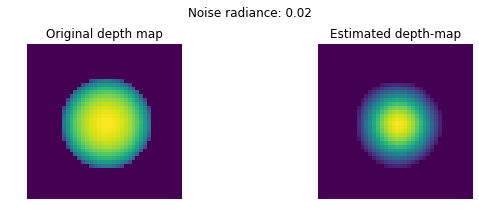

For noise = 0.04, convergent_lambda is 0.01
Error: 0.024402616003653833


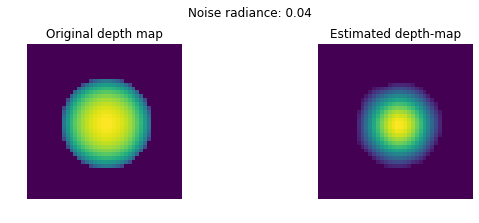

For noise = 0.06, convergent_lambda is 0.01
Error: 0.02349229305651727


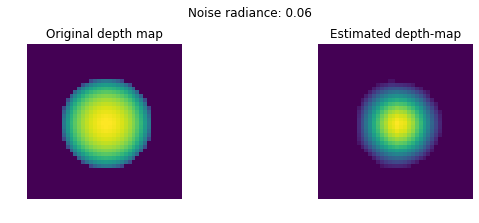

For noise = 0.08, convergent_lambda is 0.01
Error: 0.025175414394214456


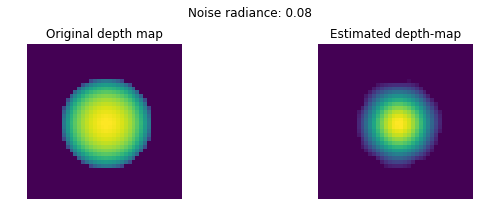

For noise = 0.1, convergent_lambda is 0.01
Error: 0.027087016128650415


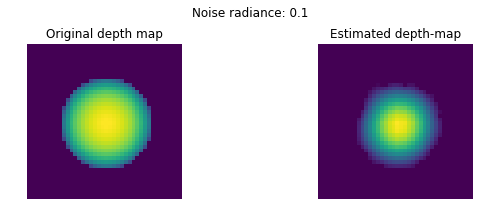

In [26]:
%matplotlib inline
%run ./shape_from_shading_alter_lambda_variance.py

In this case we observe that $\lambda$ remains the same, even when the noise changes. This is a surprising
observation and needs to be studied better.

## Actual Image Simulation
We take the image of a moon, a lambertian surface, with the sun as the point source. This situation fits our assumptions
and thus we will get a good result as seen below.

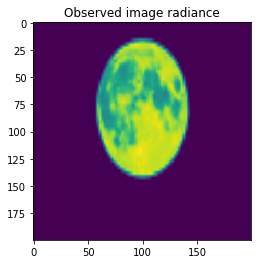

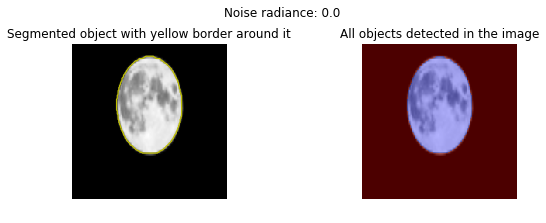

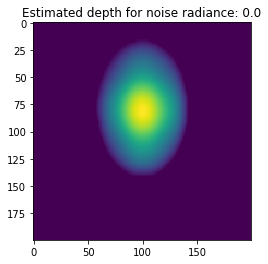

In [27]:
%matplotlib inline
%run ./shape_from_shading_using_image.py

Thus we can see that we have recovered the depth map of the moon, although we have missed some of the craters.